# Exploratory Analyses of Python vs other languages 

# Introduction
FORTRAN, which was developed in 1957, is the oldest programming language still in use today. Many more programming languages have been invented since then. But what is the most popular programming language? StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language. To figure out which language is the most popular, we count the number of posts on Stack Overflow that are tagged with each language.

## Data extraction

 SQL query to obtain data from StackExchange: 

<code>
SELECT dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
FROM PostTags pt
    JOIN Posts q on q.Id=pt.PostId
    JOIN Tags t on t.Id=pt.TagId
WHERE TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
AND q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("QueryResults.csv")

## Data Exploration

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,m,TagName,Unnamed: 2
2267,2022-03-01 00:00:00,php,4217
2268,2022-03-01 00:00:00,python,25788
2269,2022-03-01 00:00:00,r,5197
2270,2022-03-01 00:00:00,ruby,546
2271,2022-03-01 00:00:00,swift,2179


#### - Shape of data

In [5]:
df.shape

(2272, 3)

#### - Number of entries in each column of the dataframe

In [12]:
df.count()

DATE     2272
TAG      2272
POSTS    2272
dtype: int64

### Data Cleaning
#### -Rename the column names

In [7]:
df. rename(columns = {'m':'DATE', 'TagName':'TAG', 'Unnamed: 2':'POSTS'}, inplace = True)

In [9]:
df.head(1)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3


#### -Remove the timestamp from date

In [16]:
df.DATE[1]

'2008-08-01 00:00:00'

In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [19]:
df.head(2)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8


#### - Number of posts per programming language

In [10]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,39915
c,376557
c#,1528775
c++,758545
delphi,49394
go,60347
java,1834127
javascript,2351332
perl,66553


In [11]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,164,164
c,164,164
c#,165,165
c++,164,164
delphi,164,164
go,149,149
java,164,164
javascript,164,164
perl,164,164


### Data Manipulation

#### -Pivot the table to make languages columns

In [20]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,164.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN


#### -Count of langugeas based on date

In [21]:
pivoted_df.count()

TAG
assembly      164
c             164
c#            165
c++           164
delphi        164
go            149
java          164
javascript    164
perl          164
php           164
python        164
r             162
ruby          164
swift         156
dtype: int64

#### - NaN replace by nulls

In [23]:
pivoted_df.fillna(0, inplace=True)

In [25]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


In [26]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


#### -Python by posts over time 

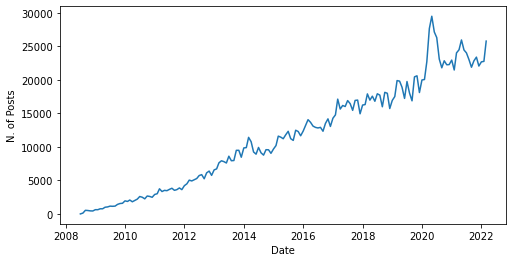

In [51]:
plt.figure(figsize=(8,4))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=(10))
plt.ylabel('N. of Posts', fontsize=(10))
plt.plot(pivoted_df.index, pivoted_df['python'])

#### -Python vs R by posts over time

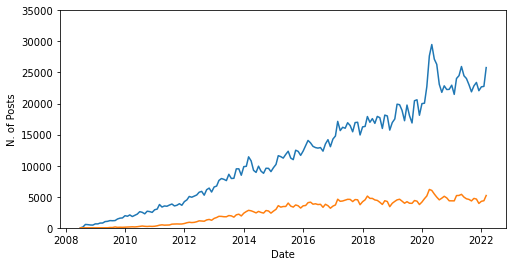

In [85]:
plt.figure(figsize=(8,4))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=(10))
plt.ylabel('N. of Posts', fontsize=(10))
plt.ylim(0, 35000)


plt.plot(pivoted_df.index, pivoted_df['python'], pivoted_df['r'])

#### -All languages by time series

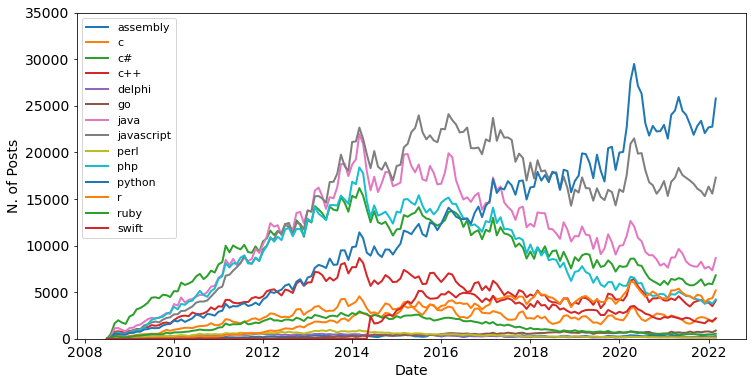

In [84]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=(14))
plt.ylabel('N. of Posts', fontsize=(14))
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column],
            linewidth=2, label=pivoted_df[column].name)
    
plt.legend(fontsize=11) 

#### -Smoothed out time series

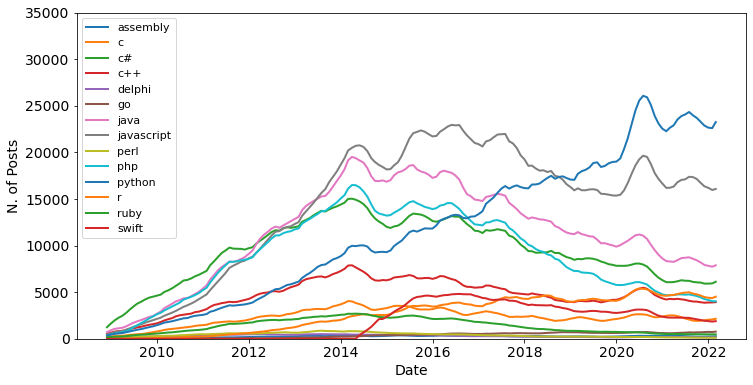

In [81]:
roll_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=(14))
plt.ylabel('N. of Posts', fontsize=(14))
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(roll_df.index, roll_df[column],
            linewidth=2, label=roll_df[column].name)
    
plt.legend(fontsize=11) 

# Conclusion
Based on the findings above, it is evident that Python has been the most popular language. Its number of tags has grown steadily from 2008; its highest growth occured between 2020 and 2021. Out of other programming languages, Javascript has kept its popularity. R